#    MODULE 0 - INTRODUCTION

# --- EXPLORE THE DATA -------------------------------------

In [1]:
# Load text file into local variable called 'data'
data = read.delim(file = 'purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [2]:
data

V1,V2,V3
<int>,<dbl>,<fct>
760,25,2009-11-06
860,50,2012-09-28
1200,100,2005-10-25
1420,50,2009-07-09
1940,70,2013-01-25
1960,40,2013-10-29
2620,30,2006-03-09
3050,50,2007-04-12
3120,150,2006-11-08


In [3]:
# Display what has been loaded
head(data)
summary(data)

,V1,V2,V3
,<int>,<dbl>,<fct>
1,760,25,2009-11-06
2,860,50,2012-09-28
3,1200,100,2005-10-25
4,1420,50,2009-07-09
5,1940,70,2013-01-25
6,1960,40,2013-10-29


       V1               V2                   V3       
 Min.   :    10   Min.   :   5.00   2013-12-31:  864  
 1st Qu.: 57720   1st Qu.:  25.00   2006-12-31:  584  
 Median :102440   Median :  30.00   2012-12-31:  583  
 Mean   :108935   Mean   :  62.34   2011-12-31:  510  
 3rd Qu.:160525   3rd Qu.:  60.00   2008-12-31:  503  
 Max.   :264200   Max.   :4500.00   2014-12-31:  485  
                                    (Other)   :47714  

In [4]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$year_of_purchase = as.numeric(format(data$date_of_purchase, "%Y"))

In [5]:
# Display the data set after transformation
head(data)
summary(data)

,customer_id,purchase_amount,date_of_purchase,year_of_purchase
,<int>,<dbl>,<date>,<dbl>
1,760,25,2009-11-06,2009
2,860,50,2012-09-28,2012
3,1200,100,2005-10-25,2005
4,1420,50,2009-07-09,2009
5,1940,70,2013-01-25,2013
6,1960,40,2013-10-29,2013


  customer_id     purchase_amount   date_of_purchase     year_of_purchase
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :2005    
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.:2009    
 Median :102440   Median :  30.00   Median :2011-11-23   Median :2011    
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :2011    
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2013    
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :2015    

In [6]:
# Explore the data using simple SQL statements
library(sqldf)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



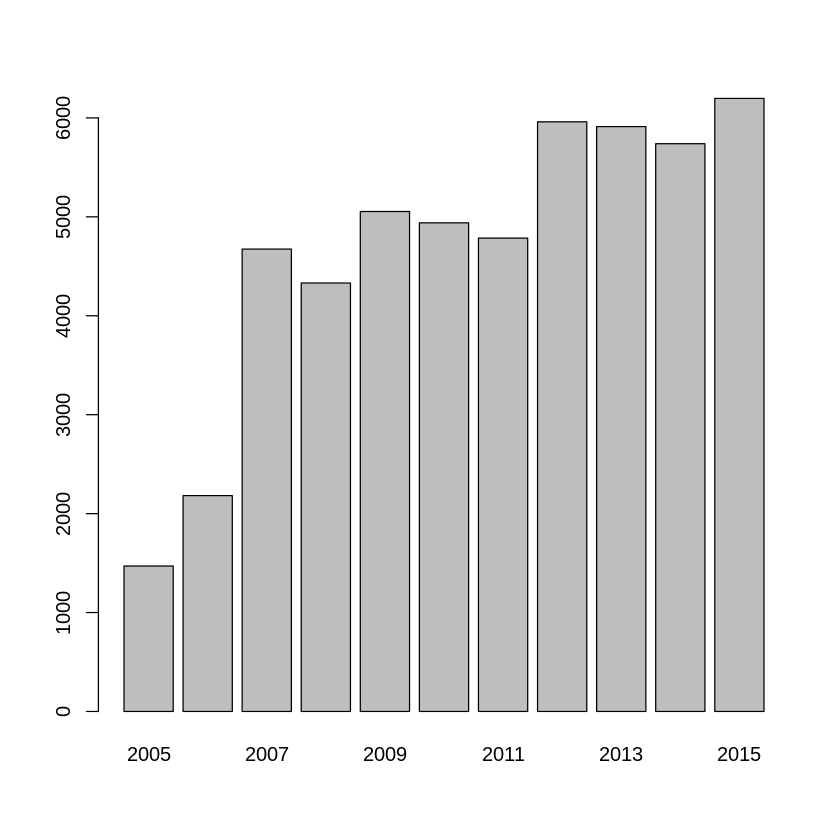

In [7]:
# Number of purchases per year
x = sqldf("SELECT year_of_purchase, COUNT(year_of_purchase) AS 'counter' FROM data GROUP BY 1 ORDER BY 1")
barplot(x$counter, names.arg = x$year_of_purchase)

In [8]:
x

year_of_purchase,counter
<dbl>,<int>
2005,1470
2006,2182
2007,4674
2008,4331
2009,5054
2010,4939
2011,4785
2012,5960
2013,5912


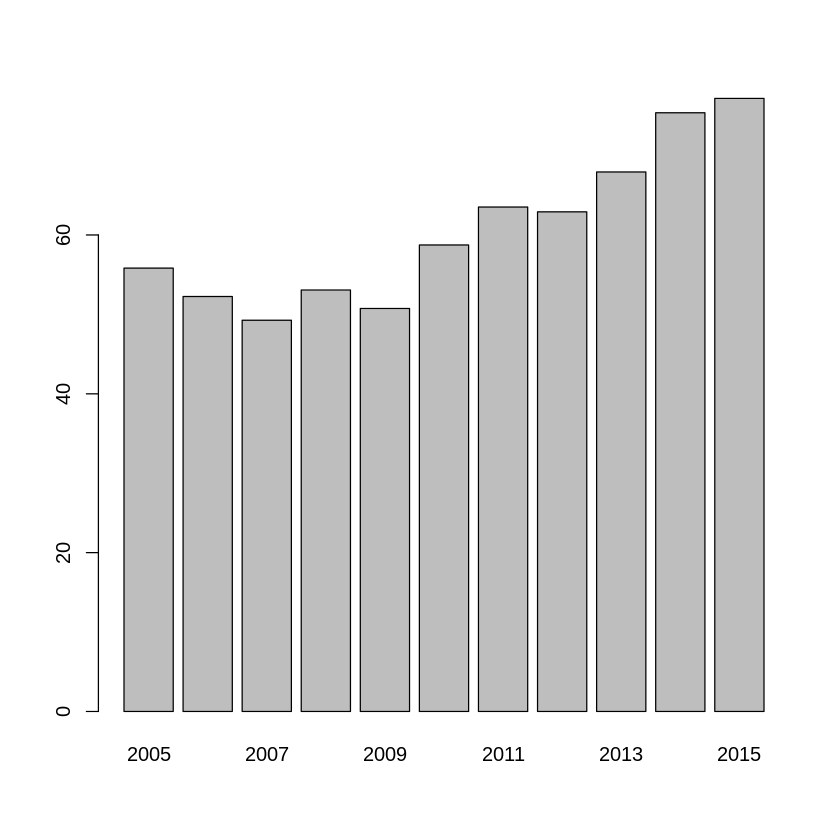

In [9]:
# Average purchase amount per year
x = sqldf("SELECT year_of_purchase, AVG(purchase_amount) AS 'avg_amount' FROM data GROUP BY 1 ORDER BY 1")
barplot(x$avg_amount, names.arg = x$year_of_purchase)

In [10]:
x

year_of_purchase,avg_amount
<dbl>,<dbl>
2005,55.82612
2006,52.25045
2007,49.26401
2008,53.07178
2009,50.74525
2010,58.74001
2011,63.51930
2012,62.91331
2013,67.93136


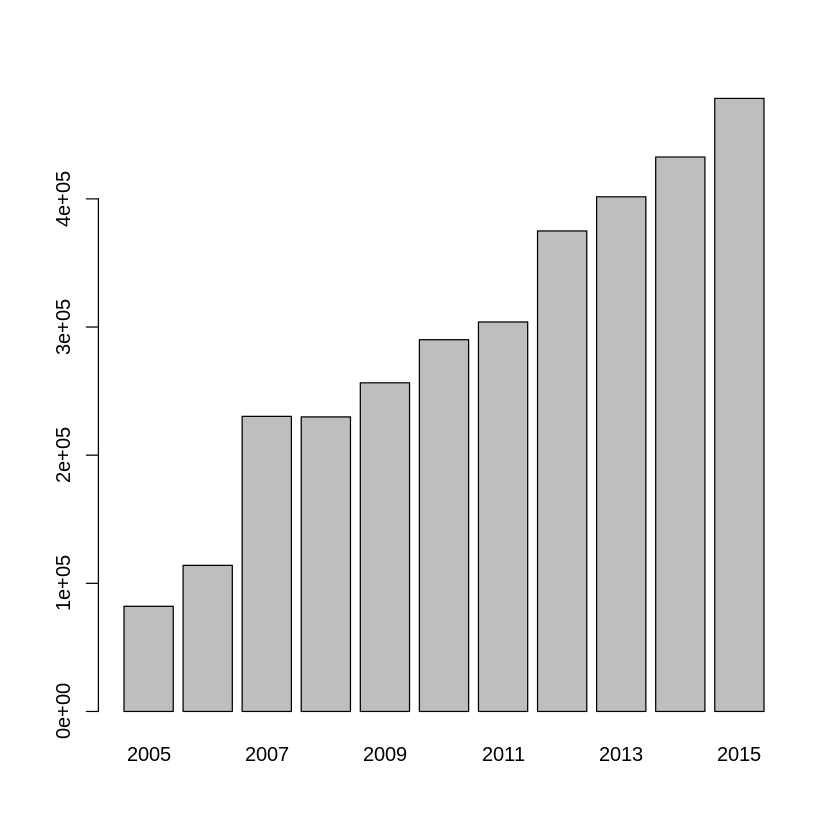

In [11]:
# Total purchase amounts per year
x = sqldf("SELECT year_of_purchase, SUM(purchase_amount) AS 'sum_amount' FROM data GROUP BY 1 ORDER BY 1")
barplot(x$sum_amount, names.arg = x$year_of_purchase)

In [12]:
# All in one
x = sqldf("SELECT year_of_purchase,
                  COUNT(year_of_purchase) AS 'counter',
                  AVG(purchase_amount) AS 'avg_amount',
                  SUM(purchase_amount) AS 'sum_amount'
           FROM data GROUP BY 1 ORDER BY 1")
print(x)

   year_of_purchase counter avg_amount sum_amount
1              2005    1470   55.82612    82064.4
2              2006    2182   52.25045   114010.5
3              2007    4674   49.26401   230260.0
4              2008    4331   53.07178   229853.9
5              2009    5054   50.74525   256466.5
6              2010    4939   58.74001   290116.9
7              2011    4785   63.51930   303939.8
8              2012    5960   62.91331   374963.3
9              2013    5912   67.93136   401610.2
10             2014    5739   75.39035   432665.2
11             2015    6197   77.19770   478394.1


#    MODULE 1 - STATISTICAL SEGMENTATION

In [13]:
# Load text file into local variable called 'data'
data = read.delim(file = 'purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [14]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$days_since       = as.numeric(difftime(time1 = "2016-01-01",
                                            time2 = data$date_of_purchase,
                                            units = "days"))

In [15]:
# Display the data after transformation
head(data)
summary(data)

,customer_id,purchase_amount,date_of_purchase,days_since
,<int>,<dbl>,<date>,<dbl>
1,760,25,2009-11-06,2246.6667
2,860,50,2012-09-28,1189.6667
3,1200,100,2005-10-25,3719.6667
4,1420,50,2009-07-09,2366.6667
5,1940,70,2013-01-25,1070.6667
6,1960,40,2013-10-29,793.6667


  customer_id     purchase_amount   date_of_purchase       days_since      
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :   0.667  
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.: 732.667  
 Median :102440   Median :  30.00   Median :2011-11-23   Median :1499.667  
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :1631.606  
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2539.667  
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :4015.667  

In [16]:
# Compute key marketing indicators using SQL language
library(sqldf)

In [17]:
# Compute recency, frequency, and average purchase amount
customers = sqldf("SELECT customer_id,
                          MIN(days_since) AS 'recency',
                          COUNT(*) AS 'frequency',
                          AVG(purchase_amount) AS 'amount'
                   FROM data GROUP BY 1")

In [18]:
customers

customer_id,recency,frequency,amount
<int>,<dbl>,<int>,<dbl>
10,3828.66667,1,30.00000
80,342.66667,7,71.42857
90,757.66667,10,115.80000
120,1400.66667,1,20.00000
130,2969.66667,2,50.00000
160,2962.66667,2,30.00000
190,2210.66667,5,68.00000
220,2057.66667,2,25.00000
230,3984.66667,1,50.00000


,customer_id,recency,frequency,amount
,<int>,<dbl>,<int>,<dbl>
1,10,3828.6667,1,30.00000
2,80,342.6667,7,71.42857
3,90,757.6667,10,115.80000
4,120,1400.6667,1,20.00000
5,130,2969.6667,2,50.00000
6,160,2962.6667,2,30.00000


  customer_id        recency           frequency          amount       
 Min.   :    10   Min.   :   0.667   Min.   : 1.000   Min.   :   5.00  
 1st Qu.: 81990   1st Qu.: 243.667   1st Qu.: 1.000   1st Qu.:  21.67  
 Median :136430   Median :1069.667   Median : 2.000   Median :  30.00  
 Mean   :137574   Mean   :1252.705   Mean   : 2.782   Mean   :  57.79  
 3rd Qu.:195100   3rd Qu.:2129.667   3rd Qu.: 3.000   3rd Qu.:  50.00  
 Max.   :264200   Max.   :4013.667   Max.   :45.000   Max.   :4500.00  

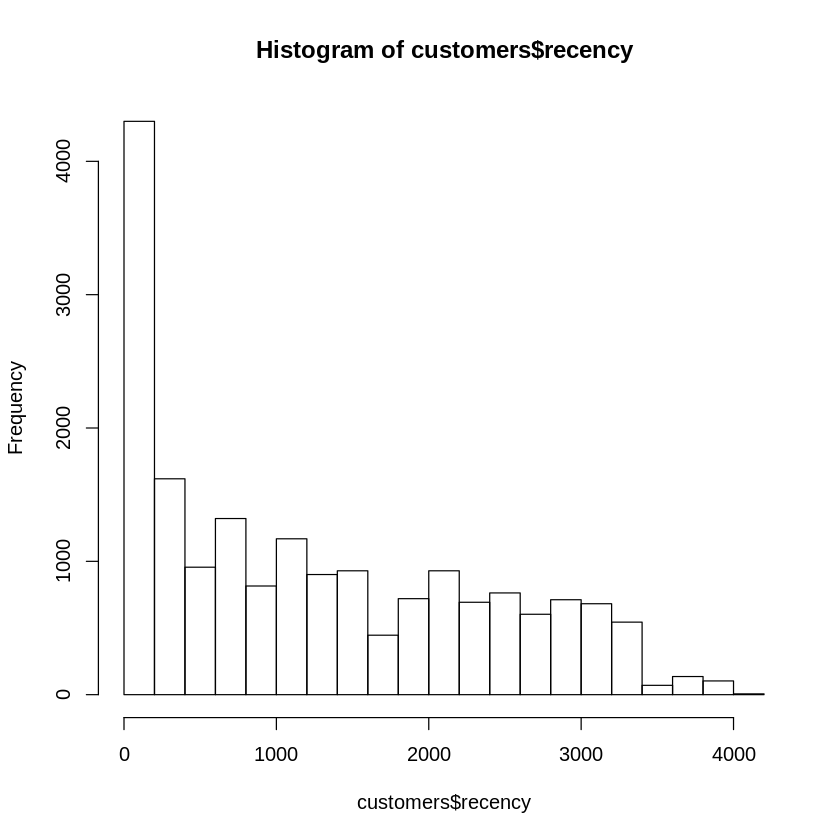

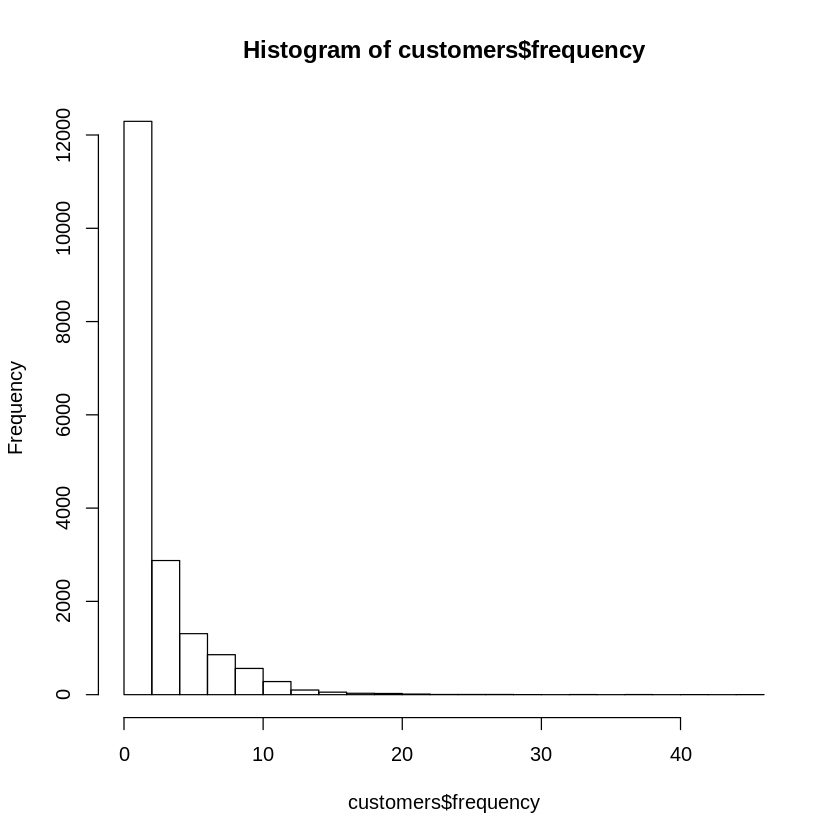

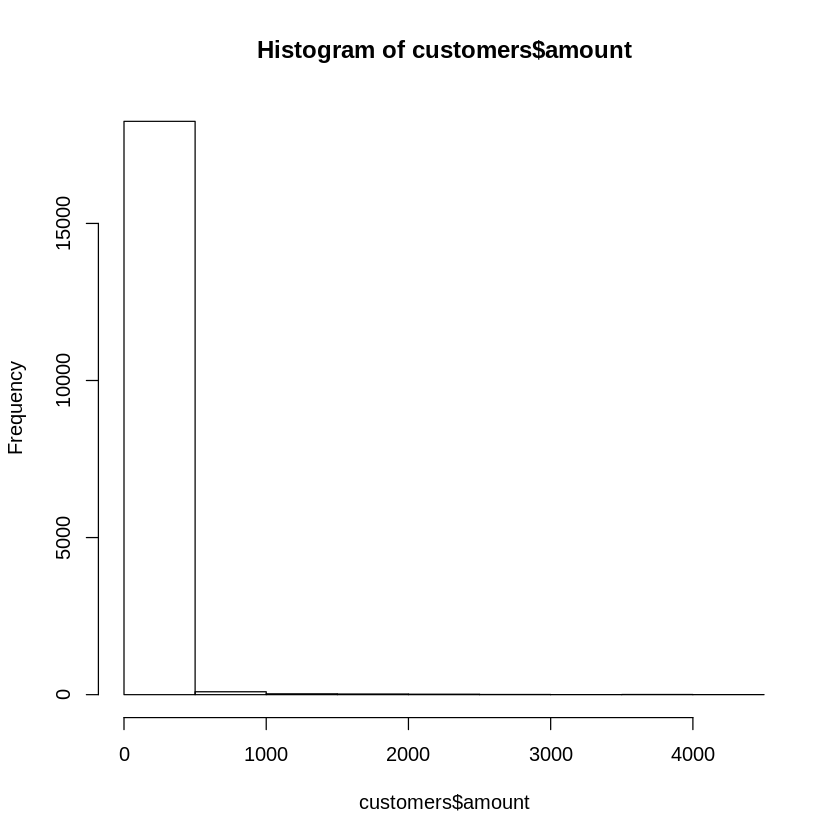

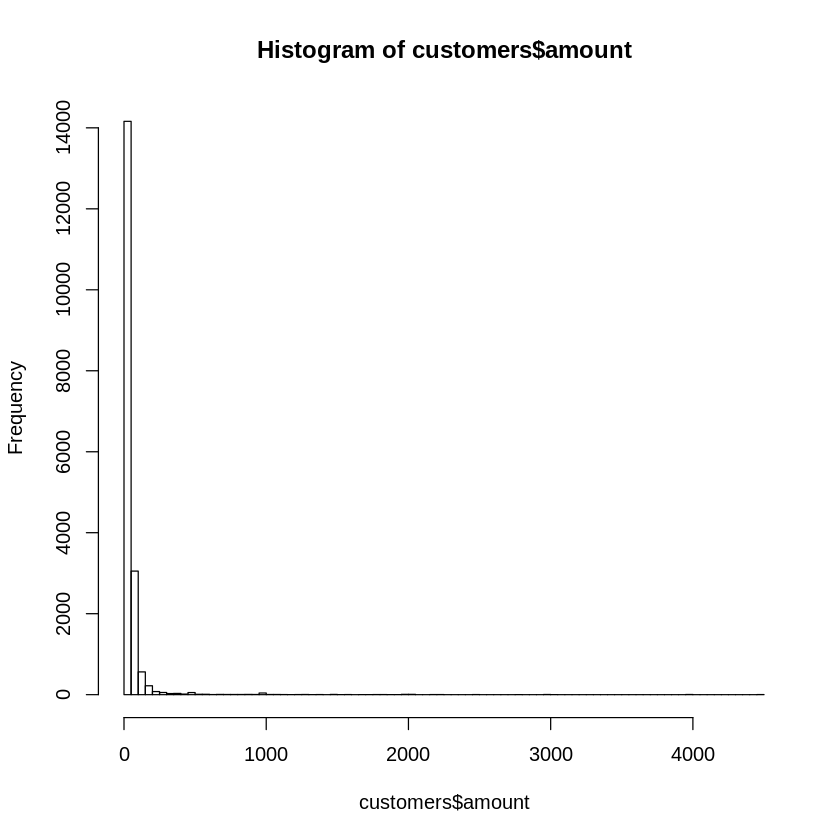

In [19]:
# Explore the data
head(customers)
summary(customers)
hist(customers$recency)
hist(customers$frequency)
hist(customers$amount)
hist(customers$amount, breaks = 100)

# --- PREPARING AND TRANSFORMING DATA ----------------------

In [20]:
# Copy customer data into new data frame
new_data = customers

In [21]:
# Remove customer id as a variable, store it as row names
head(new_data)
row.names(new_data) = new_data$customer_id
new_data$customer_id = NULL
head(new_data)


,customer_id,recency,frequency,amount
,<int>,<dbl>,<int>,<dbl>
1,10,3828.6667,1,30.00000
2,80,342.6667,7,71.42857
3,90,757.6667,10,115.80000
4,120,1400.6667,1,20.00000
5,130,2969.6667,2,50.00000
6,160,2962.6667,2,30.00000


,recency,frequency,amount
,<dbl>,<int>,<dbl>
10,3828.6667,1,30.00000
80,342.6667,7,71.42857
90,757.6667,10,115.80000
120,1400.6667,1,20.00000
130,2969.6667,2,50.00000
160,2962.6667,2,30.00000


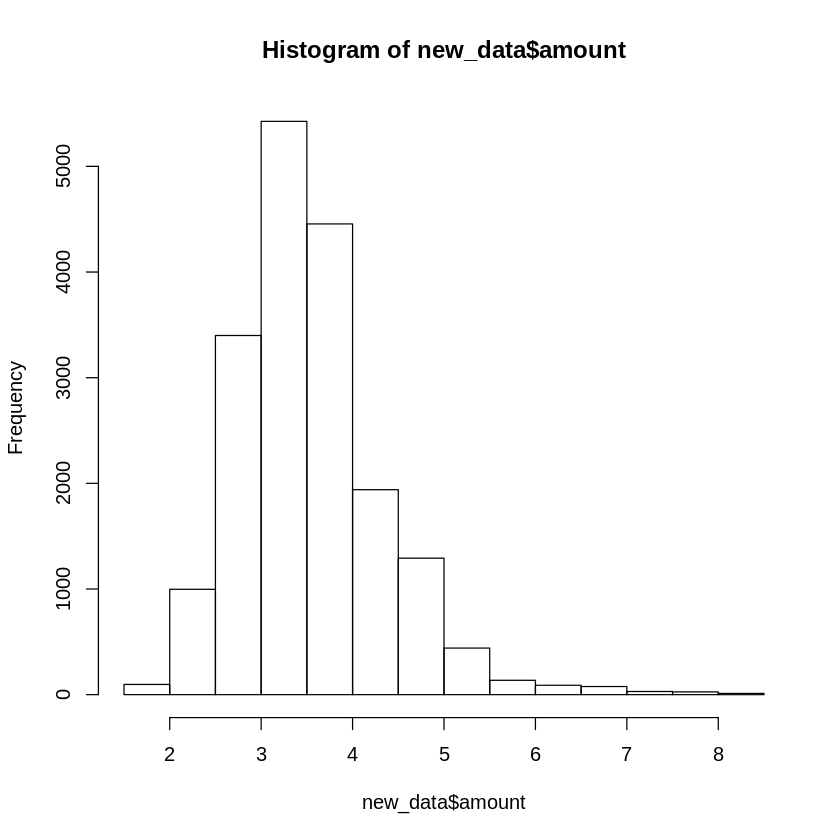

In [22]:
# Take the log-transform of the amount, and plot
new_data$amount = log(new_data$amount)
hist(new_data$amount)

In [23]:
new_data

,recency,frequency,amount
,<dbl>,<int>,<dbl>
10,3828.66667,1,3.401197
80,342.66667,7,4.268698
90,757.66667,10,4.751865
120,1400.66667,1,2.995732
130,2969.66667,2,3.912023
160,2962.66667,2,3.401197
190,2210.66667,5,4.219508
220,2057.66667,2,3.218876
230,3984.66667,1,3.912023


In [24]:
# Standardize variables
new_data = scale(new_data)
head(new_data)

,recency,frequency,amount
10,2.3819788,-0.6068923,-0.2357955
80,-0.8415073,1.4360863,0.8943622
90,-0.4577590,2.4575756,1.5238194
120,0.1368198,-0.6068923,-0.7640251
130,1.5876660,-0.2663959,0.4296952
160,1.5811931,-0.2663959,-0.2357955


In [25]:
new_data

,recency,frequency,amount
10,2.38197882,-0.60689233,-0.23579547
80,-0.84150734,1.43608630,0.89436221
90,-0.45775898,2.45757562,1.52381939
120,0.13681979,-0.60689233,-0.76402511
130,1.58766597,-0.26639590,0.42969516
160,1.58119310,-0.26639590,-0.23579547
190,0.88582260,0.75509342,0.83027841
220,0.74434429,-0.26639590,-0.47331936
230,2.52623122,-0.60689233,0.42969516
240,-0.73054396,0.41459698,-1.03453239


# --- RUNNING A HIERARCHICAL SEGMENTATION ------------------

In [26]:
# Compute distance metrics on standardized data
# This will likely generate an error on most machines
# d = dist(new_data)

In [27]:
# Take a 10% sample
sample = seq(1, 18417, by = 10)
head(sample)
customers_sample = customers[sample, ]
new_data_sample  = new_data[sample, ]

[1]  1 11 21 31 41 51

In [28]:
# Compute distance metrics on standardized data
d = dist(new_data_sample)

In [29]:
# Perform hierarchical clustering on distance metrics
c = hclust(d, method="ward.D2")


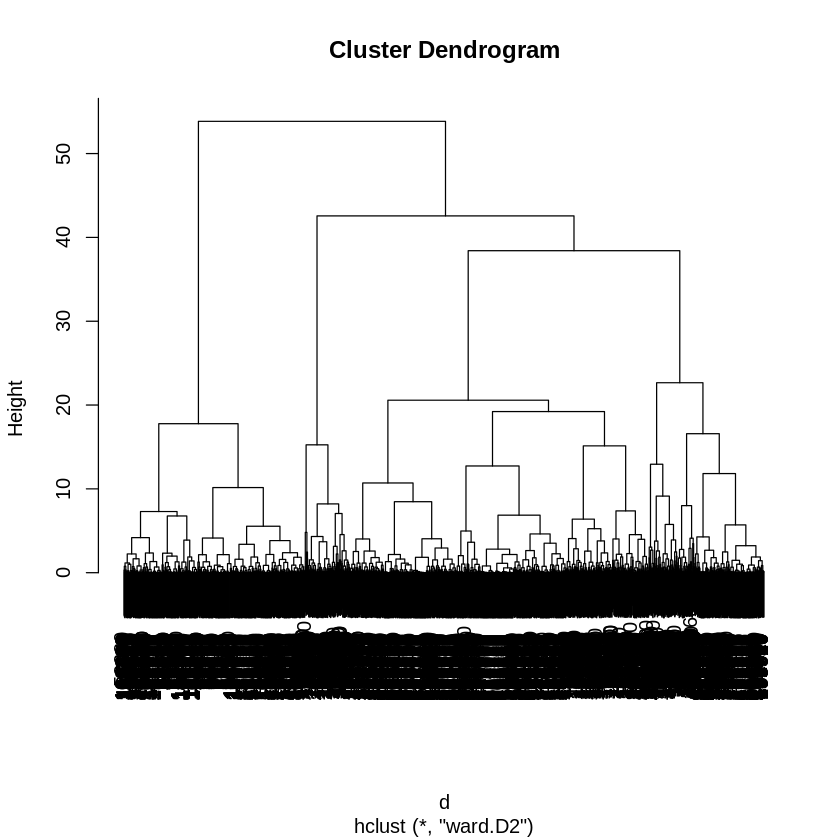

In [30]:
# Plot de dendogram
plot(c)

In [31]:
# Cut at 9 segments
members = cutree(c, k = 9)

In [32]:
# Show 30 first customers, frequency table
members[1:30]
table(members)

10  260  510  850 1040 1430 1860 2160 2380 2700 3000 3140 3650 3920 4240 4470 
   1    2    1    3    4    1    4    5    6    7    7    5    3    1    2    3 
4710 4910 5230 5520 5710 5920 6080 6240 6410 6600 6750 6940 7100 7330 
   6    7    4    5    1    5    8    5    6    1    3    3    7    2

members
  1   2   3   4   5   6   7   8   9 
309 212 130 306  49  83 236 317 200 

In [33]:
# Show profile of each segment
aggregate(customers_sample[, 2:4], by = list(members), mean)

Group.1,recency,frequency,amount
<int>,<dbl>,<dbl>,<dbl>
1,2562.9029,1.284790,37.78474
2,2683.9591,1.311321,16.26336
3,193.3128,10.615385,42.01521
4,161.7712,2.398693,41.10641
5,2566.7075,1.857143,214.86197
6,448.2450,6.578313,261.21914
7,1143.3616,4.466102,29.85421
8,922.4963,1.280757,22.43357
9,799.0067,1.400000,87.42917


#    MODULE 2 - MANAGERIAL SEGMENTATION

# --- COMPUTING RECENCY, FREQUENCY, MONETARY VALUE ---------

In [34]:
# Load text file into local variable called 'data'
data = read.delim(file = 'purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [35]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$year_of_purchase = as.numeric(format(data$date_of_purchase, "%Y"))
data$days_since       = as.numeric(difftime(time1 = "2016-01-01",
                                            time2 = data$date_of_purchase,
                                            units = "days"))

In [36]:
# Display the data after transformation
head(data)
summary(data)


,customer_id,purchase_amount,date_of_purchase,year_of_purchase,days_since
,<int>,<dbl>,<date>,<dbl>,<dbl>
1,760,25,2009-11-06,2009,2246.6667
2,860,50,2012-09-28,2012,1189.6667
3,1200,100,2005-10-25,2005,3719.6667
4,1420,50,2009-07-09,2009,2366.6667
5,1940,70,2013-01-25,2013,1070.6667
6,1960,40,2013-10-29,2013,793.6667


  customer_id     purchase_amount   date_of_purchase     year_of_purchase
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :2005    
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.:2009    
 Median :102440   Median :  30.00   Median :2011-11-23   Median :2011    
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :2011    
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2013    
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :2015    
   days_since      
 Min.   :   0.667  
 1st Qu.: 732.667  
 Median :1499.667  
 Mean   :1631.606  
 3rd Qu.:2539.667  
 Max.   :4015.667  

In [37]:
# Compute key marketing indicators using SQL language
library(sqldf)

In [38]:
# Compute recency, frequency, and average purchase amount
customers_2015 = sqldf("SELECT customer_id,
                               MIN(days_since) AS 'recency',
                               MAX(days_since) AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data GROUP BY 1")

,customer_id,recency,first_purchase,frequency,amount
,<int>,<dbl>,<dbl>,<int>,<dbl>
1,10,3828.6667,3828.667,1,30.00000
2,80,342.6667,3750.667,7,71.42857
3,90,757.6667,3782.667,10,115.80000
4,120,1400.6667,1400.667,1,20.00000
5,130,2969.6667,3709.667,2,50.00000
6,160,2962.6667,3576.667,2,30.00000


  customer_id        recency         first_purchase       frequency     
 Min.   :    10   Min.   :   0.667   Min.   :   0.667   Min.   : 1.000  
 1st Qu.: 81990   1st Qu.: 243.667   1st Qu.: 987.667   1st Qu.: 1.000  
 Median :136430   Median :1069.667   Median :2086.667   Median : 2.000  
 Mean   :137574   Mean   :1252.705   Mean   :1983.677   Mean   : 2.782  
 3rd Qu.:195100   3rd Qu.:2129.667   3rd Qu.:2991.667   3rd Qu.: 3.000  
 Max.   :264200   Max.   :4013.667   Max.   :4015.667   Max.   :45.000  
     amount       
 Min.   :   5.00  
 1st Qu.:  21.67  
 Median :  30.00  
 Mean   :  57.79  
 3rd Qu.:  50.00  
 Max.   :4500.00  

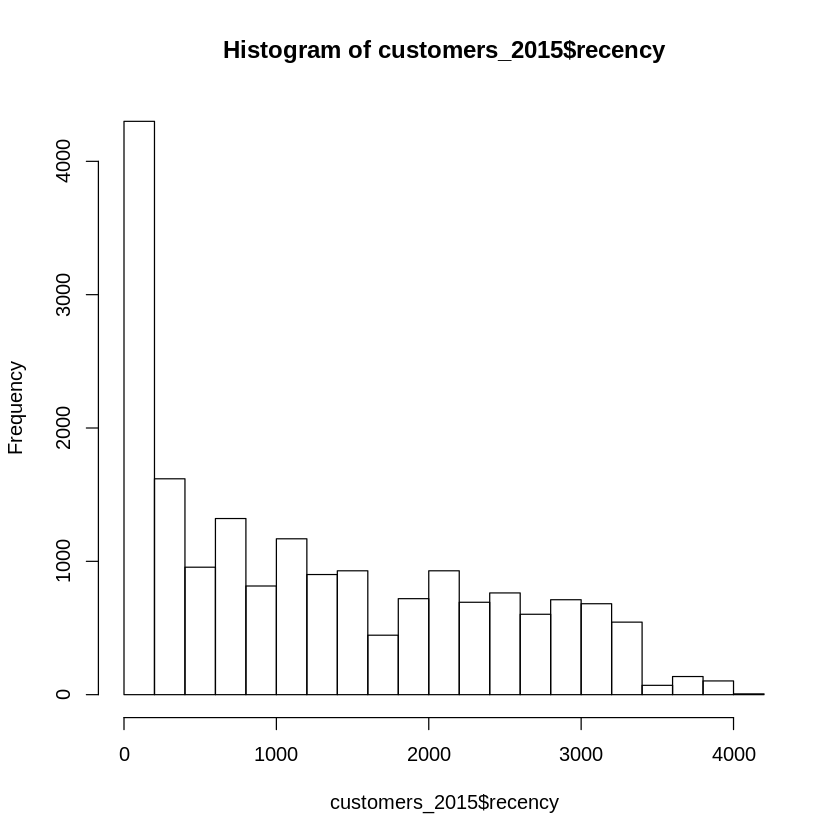

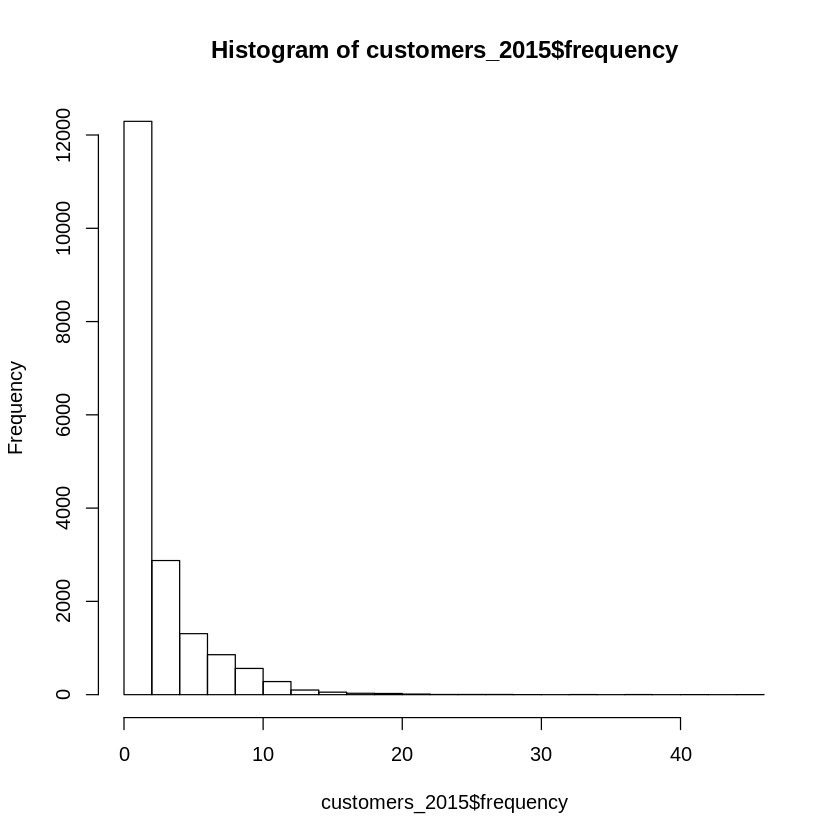

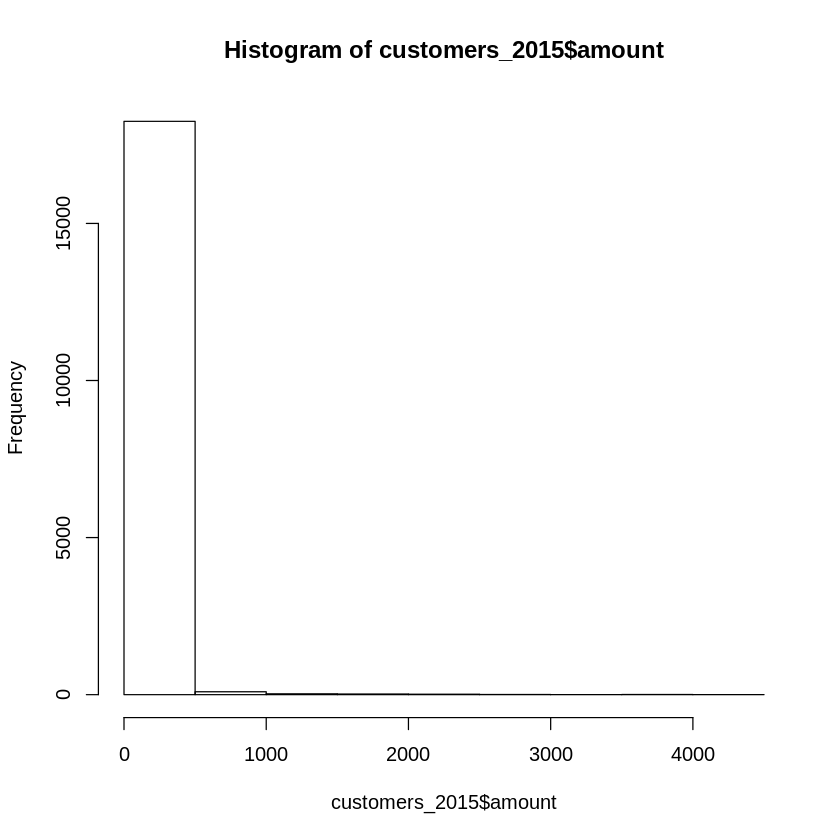

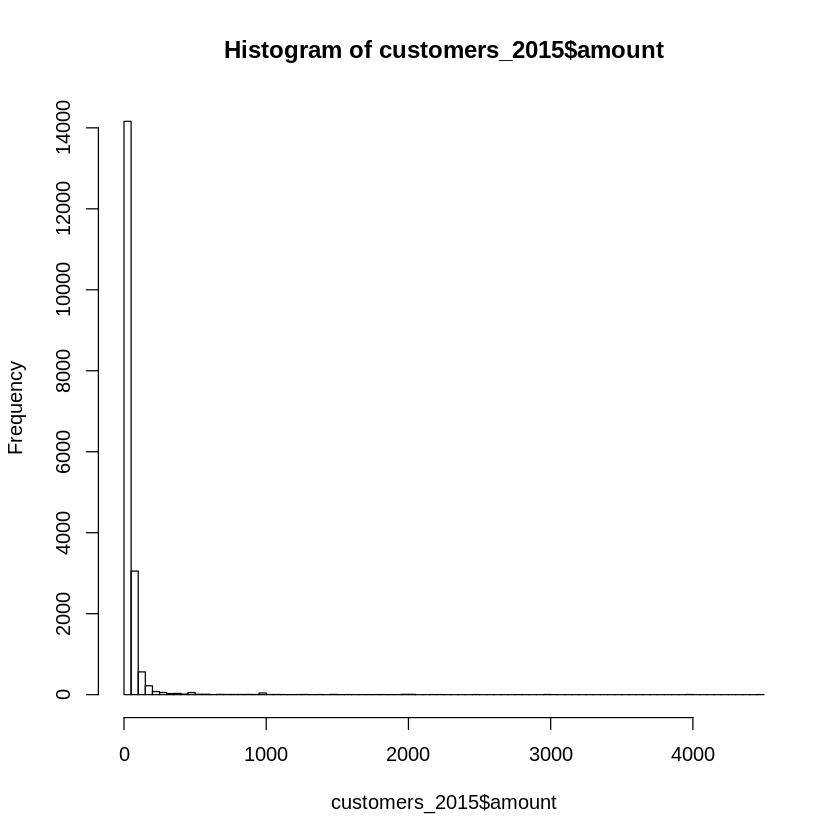

In [39]:
# Explore the data
head(customers_2015)
summary(customers_2015)
hist(customers_2015$recency)
hist(customers_2015$frequency)
hist(customers_2015$amount)
hist(customers_2015$amount, breaks = 100)

# --- CODING A MANAGERIAL SEGMENTATION ---------------------

In [40]:
# Simple 2-segment solution based on recency alone
customers_2015$segment = ifelse(test = customers_2015$recency > 365*3, yes = "inactive", no = "NA")
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


inactive       NA 
    9158     9259 

Group.1,recency,first_purchase,frequency,amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
inactive,2177.7775,2545.835,1.814479,48.11277
NA,337.7226,1427.650,3.739713,67.36760


In [41]:
# A more complex 3-segment solution based on recency alone
customers_2015$segment = ifelse(test = customers_2015$recency > 365*3,
                           yes = "inactive",
                           no = ifelse(test = customers_2015$recency > 365*2,
                                       yes = "cold",
                                       no = "NA"))
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


    cold inactive       NA 
    1903     9158     7356 

Group.1,recency,first_purchase,frequency,amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cold,857.4481,1431.784,2.303205,51.73989
inactive,2177.7775,2545.835,1.814479,48.11277
NA,203.2694,1426.581,4.111338,71.41050


In [42]:
# Simple 2-segment solution using the which statement
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)



inactive       NA 
    9158     9259 

Group.1,recency,first_purchase,frequency,amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
inactive,2177.7775,2545.835,1.814479,48.11277
NA,337.7226,1427.650,3.739713,67.36760


In [43]:
# More complex 4-segment solution using which
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
customers_2015$segment[which(customers_2015$recency <= 365*3 & customers_2015$recency > 365*2)] = "cold"
customers_2015$segment[which(customers_2015$recency <= 365*2 & customers_2015$recency > 365*1)] = "warm"
customers_2015$segment[which(customers_2015$recency <= 365)] = "active"
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


  active     cold inactive     warm 
    5398     1903     9158     1958 

Group.1,recency,first_purchase,frequency,amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
active,99.40731,1465.510,4.560763,72.08094
cold,857.44806,1431.784,2.303205,51.73989
inactive,2177.77750,2545.835,1.814479,48.11277
warm,489.60640,1319.257,2.872319,69.56215


In [44]:
# Complete segment solution using which, and exploiting previous test as input
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
customers_2015$segment[which(customers_2015$recency <= 365*3 & customers_2015$recency > 365*2)] = "cold"
customers_2015$segment[which(customers_2015$recency <= 365*2 & customers_2015$recency > 365*1)] = "warm"
customers_2015$segment[which(customers_2015$recency <= 365)] = "active"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$first_purchase <= 365*2)] = "new warm"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount < 100)] = "warm low value"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount >= 100)] = "warm high value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$first_purchase <= 365)] = "new active"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount < 100)] = "active low value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount >= 100)] = "active high value"
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


active high value  active low value              cold          inactive 
              573              3313              1903              9158 
       new active          new warm   warm high value    warm low value 
             1512               938               119               901 

Group.1,recency,first_purchase,frequency,amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
active high value,88.48691,1985.57592,5.888307,240.04574
active low value,108.02767,2003.46866,5.935406,40.72452
cold,857.44806,1431.78385,2.303205,51.73989
inactive,2177.77750,2545.83504,1.814479,48.11277
new active,84.65741,89.68056,1.045635,77.13385
new warm,508.97157,516.28927,1.044776,66.59903
warm high value,454.79272,2015.01961,4.714286,327.40746
warm low value,474.04403,2063.30596,4.531632,38.59193


In [45]:
# Re-order factor in a way that makes sense
customers_2015$segment = factor(x = customers_2015$segment, levels = c("inactive", "cold",
                                                             "warm high value", "warm low value", "new warm",
                                                             "active high value", "active low value", "new active"))
table(customers_2015$segment)
aggregate(x = customers_2015[, 2:5], by = list(customers_2015$segment), mean)


         inactive              cold   warm high value    warm low value 
             9158              1903               119               901 
         new warm active high value  active low value        new active 
              938               573              3313              1512 

Group.1,recency,first_purchase,frequency,amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
inactive,2177.77750,2545.83504,1.814479,48.11277
cold,857.44806,1431.78385,2.303205,51.73989
warm high value,454.79272,2015.01961,4.714286,327.40746
warm low value,474.04403,2063.30596,4.531632,38.59193
new warm,508.97157,516.28927,1.044776,66.59903
active high value,88.48691,1985.57592,5.888307,240.04574
active low value,108.02767,2003.46866,5.935406,40.72452
new active,84.65741,89.68056,1.045635,77.13385


# --- SEGMENTING A DATABASE RETROSPECTIVELY ----------------

In [46]:
# Compute key marketing indicators using SQL language
library(sqldf)

In [47]:
# Compute recency, frequency, and average purchase amount
customers_2014 = sqldf("SELECT customer_id,
                               MIN(days_since) - 365 AS 'recency',
                               MAX(days_since) - 365 AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data
                        WHERE days_since > 365
                        GROUP BY 1")

In [48]:
customers_2015

customer_id,recency,first_purchase,frequency,amount,segment
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
10,3828.66667,3828.667,1,30.00000,inactive
80,342.66667,3750.667,7,71.42857,active low value
90,757.66667,3782.667,10,115.80000,cold
120,1400.66667,1400.667,1,20.00000,inactive
130,2969.66667,3709.667,2,50.00000,inactive
160,2962.66667,3576.667,2,30.00000,inactive
190,2210.66667,3689.667,5,68.00000,inactive
220,2057.66667,3663.667,2,25.00000,inactive
230,3984.66667,3984.667,1,50.00000,inactive


In [49]:
# Complete segment solution using which, and exploiting previous test as input
customers_2014$segment = "NA"
customers_2014$segment[which(customers_2014$recency > 365*3)] = "inactive"
customers_2014$segment[which(customers_2014$recency <= 365*3 & customers_2014$recency > 365*2)] = "cold"
customers_2014$segment[which(customers_2014$recency <= 365*2 & customers_2014$recency > 365*1)] = "warm"
customers_2014$segment[which(customers_2014$recency <= 365)] = "active"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$first_purchase <= 365*2)] = "new warm"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount < 100)] = "warm low value"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount >= 100)] = "warm high value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$first_purchase <= 365)] = "new active"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount < 100)] = "active low value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount >= 100)] = "active high value"

In [50]:
# Re-order factor in a way that makes sense
customers_2014$segment = factor(x = customers_2014$segment, levels = c("inactive", "cold",
                                                                       "warm high value", "warm low value", "new warm",
                                                                       "active high value", "active low value", "new active"))


         inactive              cold   warm high value    warm low value 
             7512              2153               111               956 
         new warm active high value  active low value        new active 
             1250               475              3011              1437 

Group.1,recency,first_purchase,frequency,amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
inactive,2058.10796,2352.7035,1.730964,48.11120
cold,866.28348,1565.1107,2.254064,51.11460
warm high value,460.86486,1878.4775,4.414414,187.84911
warm low value,470.32775,1945.0934,4.361925,37.38206
new warm,496.98427,504.5467,1.057600,51.36765
active high value,85.00561,1837.7172,5.696842,261.90216
active low value,97.75767,1796.0180,5.633677,40.45917
new active,131.75365,142.5379,1.070981,69.72516


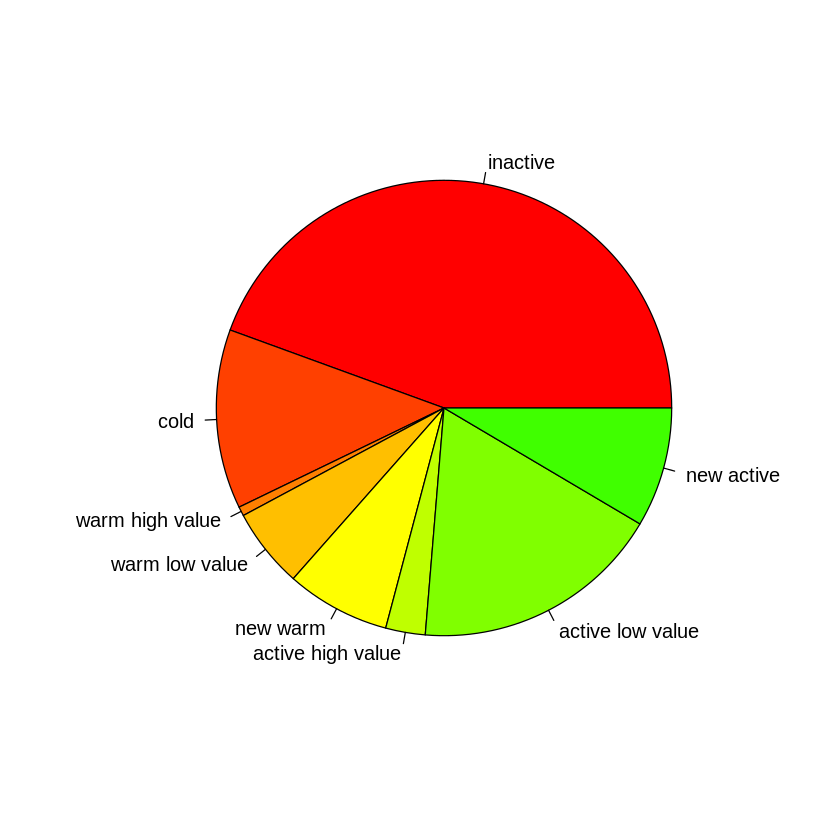

In [51]:
# Show segmentation results
table(customers_2014$segment)
pie(table(customers_2014$segment), col = rainbow(24))
aggregate(x = customers_2014[, 2:5], by = list(customers_2014$segment), mean)

# --- COMPUTING REVENUE GENERATION PER SEGMENT -------------

In [52]:
# Compute how much revenue is generated by segments
# Notice that people with no revenue in 2015 do NOT appear
revenue_2015 = sqldf("SELECT customer_id, SUM(purchase_amount) AS 'revenue_2015'
                      FROM data
                      WHERE year_of_purchase = 2015
                      GROUP BY 1")
summary(revenue_2015)

  customer_id      revenue_2015    
 Min.   :    80   Min.   :   5.00  
 1st Qu.:104105   1st Qu.:  30.00  
 Median :185495   Median :  50.00  
 Mean   :167782   Mean   :  88.62  
 3rd Qu.:246058   3rd Qu.:  85.00  
 Max.   :264200   Max.   :4500.00  

In [53]:
# Merge 2015 customers and 2015 revenue (the wrong way)
actual = merge(customers_2015, revenue_2015)

In [54]:
actual

customer_id,recency,first_purchase,frequency,amount,segment,revenue_2015
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>
80,342.6666667,3750.6666667,7,71.42857,active low value,80
480,20.6666667,3677.6666667,12,60.83333,active low value,45
830,320.6666667,3738.6666667,7,48.57143,active low value,50
850,23.6666667,3415.6666667,10,28.50000,active low value,60
860,236.6666667,4007.6666667,10,54.00000,active low value,60
1020,0.6666667,2191.6666667,5,68.00000,active low value,120
1040,55.6666667,3803.6666667,4,42.50000,active low value,30
1150,9.6666667,3663.6666667,11,64.09091,active low value,85
1310,2.6666667,3813.6666667,11,29.09091,active low value,30


In [55]:
# Merge 2015 customers and 2015 revenue (correct)
actual = merge(customers_2015, revenue_2015, all.x = TRUE)
actual$revenue_2015[is.na(actual$revenue_2015)] = 0

In [56]:
# Show average revenue per customer and per segment
aggregate(x = actual$revenue_2015, by = list(customers_2015$segment), mean)

Group.1,x
<fct>,<dbl>
inactive,0.00000
cold,0.00000
warm high value,0.00000
warm low value,0.00000
new warm,0.00000
active high value,323.56894
active low value,52.30604
new active,79.16614


In [57]:
# Merge 2014 customers and 2015 revenue (correct)
forward = merge(customers_2014, revenue_2015, all.x = TRUE)
forward$revenue_2015[is.na(forward$revenue_2015)] = 0

In [58]:
forward

customer_id,recency,first_purchase,frequency,amount,segment,revenue_2015
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>
10,3463.66667,3463.667,1,30.00000,inactive,0
80,301.66667,3385.667,6,70.00000,active low value,80
90,392.66667,3417.667,10,115.80000,warm high value,0
120,1035.66667,1035.667,1,20.00000,cold,0
130,2604.66667,3344.667,2,50.00000,inactive,0
160,2597.66667,3211.667,2,30.00000,inactive,0
190,1845.66667,3324.667,5,68.00000,inactive,0
220,1692.66667,3298.667,2,25.00000,inactive,0
230,3619.66667,3619.667,1,50.00000,inactive,0


In [59]:
revenue_2015

customer_id,revenue_2015
<int>,<dbl>
80,80
480,45
830,50
850,60
860,60
1020,120
1040,30
1150,85
1310,30


In [60]:
# Show average revenue per customer and per segment
r = aggregate(x = forward$revenue_2015, by = list(customers_2014$segment), mean)
print(r)

            Group.1          x
1          inactive   2.949466
2              cold   6.108221
3   warm high value 114.459459
4    warm low value  13.494770
5          new warm   5.064000
6 active high value 254.077895
7  active low value  41.896556
8        new active  31.046625


            Group.1          x
6 active high value 254.077895
3   warm high value 114.459459
7  active low value  41.896556
8        new active  31.046625
4    warm low value  13.494770
2              cold   6.108221
5          new warm   5.064000
1          inactive   2.949466


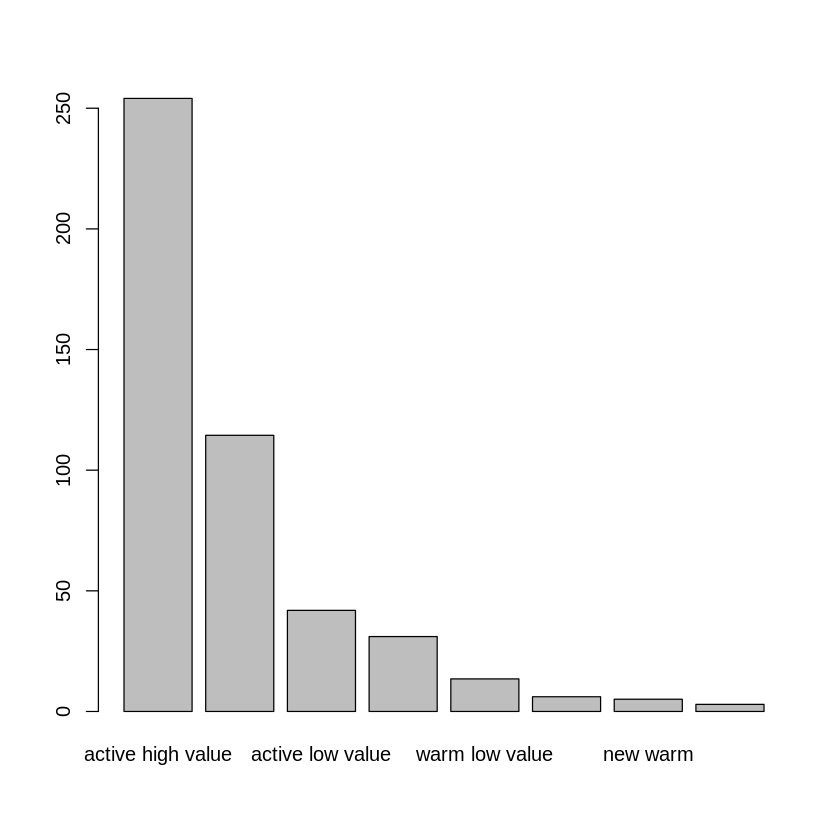

In [61]:
# Re-order and display results
r = r[order(r$x, decreasing = TRUE), ]
print(r)
barplot(r$x, names.arg = r$Group.1)

#    MODULE 3 - SCORING

# --- COMPUTING PREDICTORS AND TARGET VARIABLES ------------

In [62]:
# Load text file into local variable called 'data'
data = read.delim(file = 'purchases.txt', header = FALSE, sep = '\t', dec = '.')

# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$year_of_purchase = as.numeric(format(data$date_of_purchase, "%Y"))
data$days_since       = as.numeric(difftime(time1 = "2016-01-01",
                                            time2 = data$date_of_purchase,
                                            units = "days"))

In [63]:
# Compute key marketing indicators using SQL language
library(sqldf)

# Compute RFM variables as of a year ago
customers_2014 = sqldf("SELECT customer_id,
                               MIN(days_since) - 365 AS 'recency',
                               MAX(days_since) - 365 AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'avg_amount',
                               MAX(purchase_amount) AS 'max_amount'
                        FROM data
                        WHERE days_since > 365
                        GROUP BY 1")


In [64]:
customers_2014

customer_id,recency,first_purchase,frequency,avg_amount,max_amount
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
10,3463.66667,3463.667,1,30.00000,30
80,301.66667,3385.667,6,70.00000,80
90,392.66667,3417.667,10,115.80000,153
120,1035.66667,1035.667,1,20.00000,20
130,2604.66667,3344.667,2,50.00000,60
160,2597.66667,3211.667,2,30.00000,30
190,1845.66667,3324.667,5,68.00000,100
220,1692.66667,3298.667,2,25.00000,30
230,3619.66667,3619.667,1,50.00000,50


In [65]:
# Compute revenues generated by customers in 2015
revenue_2015 = sqldf("SELECT customer_id, SUM(purchase_amount) AS 'revenue_2015'
                      FROM data
                      WHERE year_of_purchase = 2015
                      GROUP BY 1")


In [66]:
revenue_2015

customer_id,revenue_2015
<int>,<dbl>
80,80
480,45
830,50
850,60
860,60
1020,120
1040,30
1150,85
1310,30


In [67]:
# Merge 2015 customers and 2015 revenue
in_sample = merge(customers_2014, revenue_2015, all.x = TRUE)
in_sample$revenue_2015[is.na(in_sample$revenue_2015)] = 0
in_sample$active_2015 = as.numeric(in_sample$revenue_2015 > 0)

In [68]:
# Display calibration (in-sample) data
head(in_sample)
summary(in_sample)


,customer_id,recency,first_purchase,frequency,avg_amount,max_amount,revenue_2015,active_2015
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,3463.6667,3463.667,1,30.0,30,0,0
2,80,301.6667,3385.667,6,70.0,80,80,1
3,90,392.6667,3417.667,10,115.8,153,0,0
4,120,1035.6667,1035.667,1,20.0,20,0,0
5,130,2604.6667,3344.667,2,50.0,60,0,0
6,160,2597.6667,3211.667,2,30.0,30,0,0


  customer_id        recency         first_purchase       frequency     
 Min.   :    10   Min.   :   0.667   Min.   :   0.667   Min.   : 1.000  
 1st Qu.: 77710   1st Qu.: 257.667   1st Qu.: 795.667   1st Qu.: 1.000  
 Median :127140   Median : 889.667   Median :1890.667   Median : 2.000  
 Mean   :127315   Mean   :1122.253   Mean   :1788.077   Mean   : 2.665  
 3rd Qu.:181800   3rd Qu.:1867.667   3rd Qu.:2694.667   3rd Qu.: 3.000  
 Max.   :245840   Max.   :3648.667   Max.   :3650.667   Max.   :40.000  
   avg_amount        max_amount       revenue_2015      active_2015    
 Min.   :   5.00   Min.   :   5.00   Min.   :   0.00   Min.   :0.0000  
 1st Qu.:  21.25   1st Qu.:  25.00   1st Qu.:   0.00   1st Qu.:0.0000  
 Median :  30.00   Median :  30.00   Median :   0.00   Median :0.0000  
 Mean   :  55.53   Mean   :  65.72   Mean   :  21.22   Mean   :0.2299  
 3rd Qu.:  50.00   3rd Qu.:  60.00   3rd Qu.:   0.00   3rd Qu.:0.0000  
 Max.   :4500.00   Max.   :4500.00   Max.   :4500.00   Ma

# --- CALIBRATE THE MODELS ---------------------------------

In [69]:
# Calibrate probability model
library(nnet)
prob.model = multinom(formula = active_2015 ~ recency + first_purchase + frequency + avg_amount + max_amount,
                      data = in_sample)
coef = summary(prob.model)$coefficients
std  = summary(prob.model)$standard.errors
print(coef)
print(std)
print(coef / std)

# weights:  7 (6 variable)
initial  value 11717.653087 
iter  10 value 6233.725252
final  value 6184.465956 
converged
   (Intercept)        recency first_purchase      frequency     avg_amount 
 -0.5337943653  -0.0019651144  -0.0000116325   0.2195099591   0.0004159640 
    max_amount 
 -0.0001558104 
   (Intercept)        recency first_purchase      frequency     avg_amount 
  4.409758e-02   6.000518e-05   3.925582e-05   1.479178e-02   3.634841e-04 
    max_amount 
  2.713806e-04 
   (Intercept)        recency first_purchase      frequency     avg_amount 
   -12.1048440    -32.7490786     -0.2963254     14.8399937      1.1443805 
    max_amount 
    -0.5741399 


In [70]:
summary(prob.model)

Call:
multinom(formula = active_2015 ~ recency + first_purchase + frequency + 
    avg_amount + max_amount, data = in_sample)

Coefficients:
                      Values    Std. Err.
(Intercept)    -0.5337943653 4.409758e-02
recency        -0.0019651144 6.000518e-05
first_purchase -0.0000116325 3.925582e-05
frequency       0.2195099591 1.479178e-02
avg_amount      0.0004159640 3.634841e-04
max_amount     -0.0001558104 2.713806e-04

Residual Deviance: 12368.93 
AIC: 12380.93 

In [71]:
# For the monetary model, select only those who made a purchase
z = which(in_sample$active_2015 == 1)
head(in_sample[z, ])
summary(in_sample[z, ])

,customer_id,recency,first_purchase,frequency,avg_amount,max_amount,revenue_2015,active_2015
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,80,301.66667,3385.667,6,70.00000,80,80,1
18,480,15.66667,3312.667,11,62.27273,235,45,1
30,830,266.66667,3373.667,6,48.33333,60,50,1
31,850,61.66667,3050.667,8,28.12500,30,60,1
32,860,266.66667,3642.667,9,53.33333,60,60,1
39,1020,1461.66667,1826.667,3,73.33333,100,120,1


  customer_id        recency         first_purchase       frequency     
 Min.   :    80   Min.   :   0.667   Min.   :   0.667   Min.   : 1.000  
 1st Qu.: 78590   1st Qu.:  22.667   1st Qu.: 649.417   1st Qu.: 2.000  
 Median :143550   Median :  96.667   Median :1603.667   Median : 4.000  
 Mean   :134907   Mean   : 306.013   Mean   :1635.830   Mean   : 4.741  
 3rd Qu.:194362   3rd Qu.: 327.667   3rd Qu.:2665.667   3rd Qu.: 7.000  
 Max.   :236660   Max.   :3543.667   Max.   :3646.667   Max.   :40.000  
   avg_amount        max_amount       revenue_2015     active_2015
 Min.   :   5.00   Min.   :   5.00   Min.   :   5.0   Min.   :1   
 1st Qu.:  30.00   1st Qu.:  30.00   1st Qu.:  30.0   1st Qu.:1   
 Median :  40.00   Median :  50.00   Median :  50.0   Median :1   
 Mean   :  67.78   Mean   :  88.33   Mean   :  92.3   Mean   :1   
 3rd Qu.:  60.00   3rd Qu.:  80.00   3rd Qu.: 100.0   3rd Qu.:1   
 Max.   :4500.00   Max.   :4500.00   Max.   :4500.0   Max.   :1   

In [72]:
# Calibrate the monetary model (version 1)
amount.model = lm(formula = revenue_2015 ~ avg_amount + max_amount, data = in_sample[z, ])
summary(amount.model)


Call:
lm(formula = revenue_2015 ~ avg_amount + max_amount, data = in_sample[z, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2138.5   -20.1   -16.6     0.1  3361.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.74709    2.38112   8.713   <2e-16 ***
avg_amount   0.67486    0.03280  20.575   <2e-16 ***
max_amount   0.29225    0.02363  12.367   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.6 on 3883 degrees of freedom
Multiple R-squared:  0.6054,	Adjusted R-squared:  0.6052 
F-statistic:  2979 on 2 and 3883 DF,  p-value: < 2.2e-16


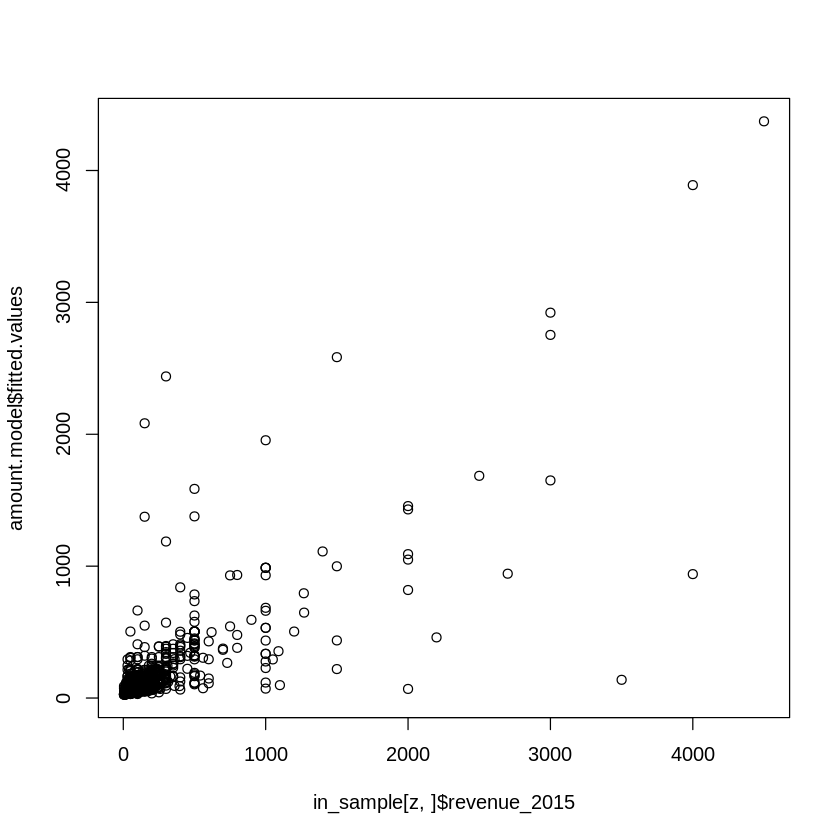

In [73]:
# Plot the results of the monetary model
plot(x = in_sample[z, ]$revenue_2015, y = amount.model$fitted.values)


In [74]:
# Re-calibrate the monetary model, using a log-transform (version 2)
amount.model = lm(formula = log(revenue_2015) ~ log(avg_amount) + log(max_amount), data = in_sample[z, ])
summary(amount.model)


Call:
lm(formula = log(revenue_2015) ~ log(avg_amount) + log(max_amount), 
    data = in_sample[z, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7866 -0.1811 -0.0770  0.1852  3.5656 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.37000    0.04003   9.242   <2e-16 ***
log(avg_amount)  0.54881    0.04167  13.171   <2e-16 ***
log(max_amount)  0.38813    0.03796  10.224   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4781 on 3883 degrees of freedom
Multiple R-squared:  0.6927,	Adjusted R-squared:  0.6926 
F-statistic:  4377 on 2 and 3883 DF,  p-value: < 2.2e-16


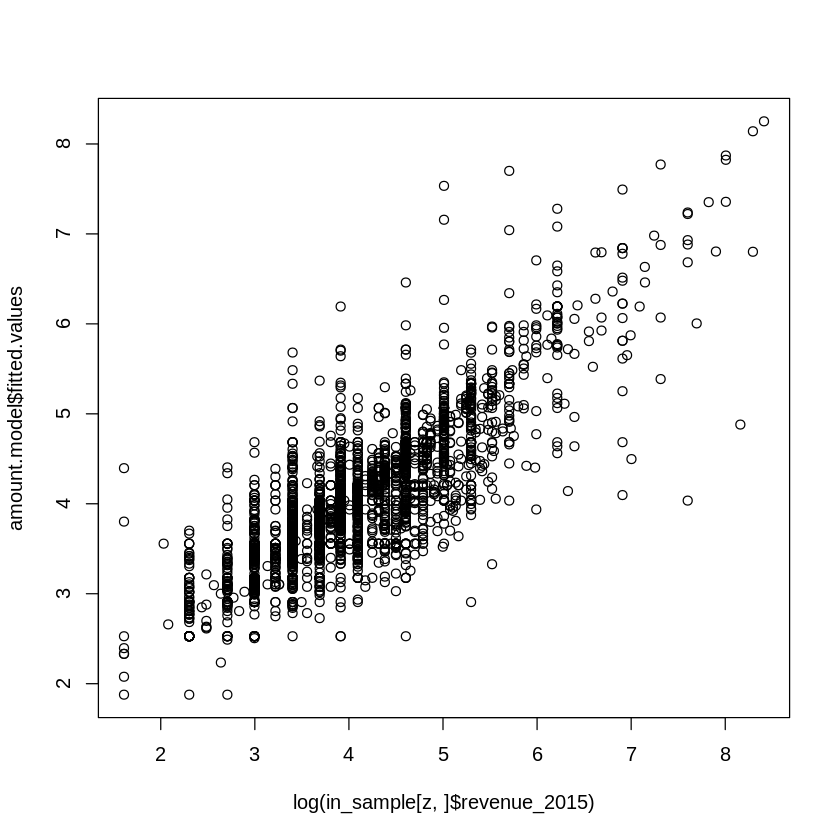

In [75]:
# Plot the results of this new monetary model
plot(x = log(in_sample[z, ]$revenue_2015), y = amount.model$fitted.values)

# --- APPLY THE MODELS TO TODAY'S DATA ---------------------

In [76]:
# Compute RFM variables as of today
customers_2015 = sqldf("SELECT customer_id,
                               MIN(days_since) AS 'recency',
                               MAX(days_since) AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'avg_amount',
                               MAX(purchase_amount) AS 'max_amount'
                        FROM data GROUP BY 1")

In [77]:
customers_2015

customer_id,recency,first_purchase,frequency,avg_amount,max_amount
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
10,3828.66667,3828.667,1,30.00000,30
80,342.66667,3750.667,7,71.42857,80
90,757.66667,3782.667,10,115.80000,153
120,1400.66667,1400.667,1,20.00000,20
130,2969.66667,3709.667,2,50.00000,60
160,2962.66667,3576.667,2,30.00000,30
190,2210.66667,3689.667,5,68.00000,100
220,2057.66667,3663.667,2,25.00000,30
230,3984.66667,3984.667,1,50.00000,50


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000263 0.012634 0.106176 0.224984 0.397811 0.999904 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.54   29.00   35.05   65.63   57.30 3832.95 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0033    0.4557    4.5559   18.8336   17.9572 2854.2620 

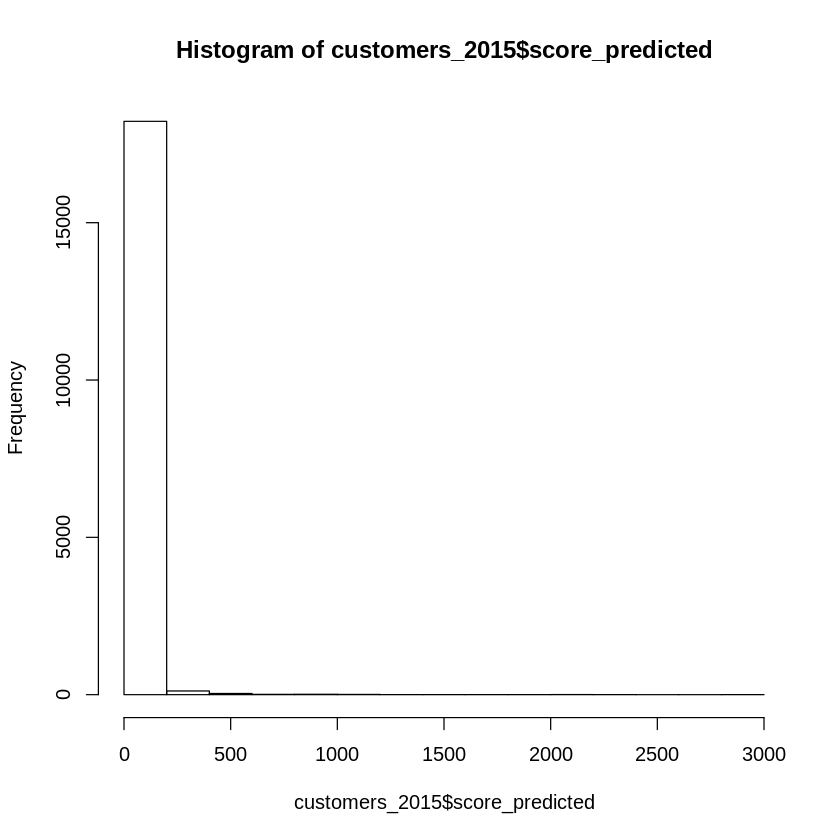

In [78]:
# Predict the target variables based on today's data
customers_2015$prob_predicted    = predict(object = prob.model, newdata = customers_2015, type = "probs")
customers_2015$revenue_predicted = exp(predict(object = amount.model, newdata = customers_2015))
customers_2015$score_predicted   = customers_2015$prob_predicted * customers_2015$revenue_predicted
summary(customers_2015$prob_predicted)
summary(customers_2015$revenue_predicted)
summary(customers_2015$score_predicted)
hist(customers_2015$score_predicted)

In [79]:
# How many customers have an expected revenue of more than $50
z = which(customers_2015$score_predicted > 50)
print(length(z))

[1] 1323


#    MODULE 4 - CUSTOMER LIFETIME VALUE

# --- SEGMENT CUSTOMERS IN 2014 AND 2015 -------------------

In [32]:
# Load text file into local variable called 'data'
data = read.delim(file = 'purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [33]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase = as.Date(data$date_of_purchase, "%Y-%m-%d")
data$year_of_purchase = as.numeric(format(data$date_of_purchase, "%Y"))
data$days_since       = as.numeric(difftime(time1 = "2016-01-01",
                                            time2 = data$date_of_purchase,
                                            units = "days"))

In [34]:
# Invoke library to compute key marketing indicators using SQL language
library(sqldf)

In [35]:
# Segment customers in 2015
customers_2015 = sqldf("SELECT customer_id,
                               MIN(days_since) AS 'recency',
                               MAX(days_since) AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data GROUP BY 1")
customers_2015$segment = "NA"
customers_2015$segment[which(customers_2015$recency > 365*3)] = "inactive"
customers_2015$segment[which(customers_2015$recency <= 365*3 & customers_2015$recency > 365*2)] = "cold"
customers_2015$segment[which(customers_2015$recency <= 365*2 & customers_2015$recency > 365*1)] = "warm"
customers_2015$segment[which(customers_2015$recency <= 365)] = "active"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$first_purchase <= 365*2)] = "new warm"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount < 100)] = "warm low value"
customers_2015$segment[which(customers_2015$segment == "warm" & customers_2015$amount >= 100)] = "warm high value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$first_purchase <= 365)] = "new active"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount < 100)] = "active low value"
customers_2015$segment[which(customers_2015$segment == "active" & customers_2015$amount >= 100)] = "active high value"
customers_2015$segment = factor(x = customers_2015$segment, levels = c("inactive", "cold",
                                                                       "warm high value", "warm low value", "new warm",
                                                                       "active high value", "active low value", "new active"))

In [36]:
customers_2015

customer_id,recency,first_purchase,frequency,amount,segment
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
10,3828.66667,3828.667,1,30.00000,inactive
80,342.66667,3750.667,7,71.42857,active low value
90,757.66667,3782.667,10,115.80000,cold
120,1400.66667,1400.667,1,20.00000,inactive
130,2969.66667,3709.667,2,50.00000,inactive
160,2962.66667,3576.667,2,30.00000,inactive
190,2210.66667,3689.667,5,68.00000,inactive
220,2057.66667,3663.667,2,25.00000,inactive
230,3984.66667,3984.667,1,50.00000,inactive


In [37]:
# Segment customers in 2014
customers_2014 = sqldf("SELECT customer_id,
                               MIN(days_since) - 365 AS 'recency',
                               MAX(days_since) - 365 AS 'first_purchase',
                               COUNT(*) AS 'frequency',
                               AVG(purchase_amount) AS 'amount'
                        FROM data
                        WHERE days_since > 365
                        GROUP BY 1")
customers_2014$segment = "NA"
customers_2014$segment[which(customers_2014$recency > 365*3)] = "inactive"
customers_2014$segment[which(customers_2014$recency <= 365*3 & customers_2014$recency > 365*2)] = "cold"
customers_2014$segment[which(customers_2014$recency <= 365*2 & customers_2014$recency > 365*1)] = "warm"
customers_2014$segment[which(customers_2014$recency <= 365)] = "active"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$first_purchase <= 365*2)] = "new warm"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount < 100)] = "warm low value"
customers_2014$segment[which(customers_2014$segment == "warm" & customers_2014$amount >= 100)] = "warm high value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$first_purchase <= 365)] = "new active"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount < 100)] = "active low value"
customers_2014$segment[which(customers_2014$segment == "active" & customers_2014$amount >= 100)] = "active high value"
customers_2014$segment = factor(x = customers_2014$segment, levels = c("inactive", "cold",
                                                                       "warm high value", "warm low value", "new warm",
                                                                       "active high value", "active low value", "new active"))


In [38]:
customers_2014

customer_id,recency,first_purchase,frequency,amount,segment
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
10,3463.66667,3463.667,1,30.00000,inactive
80,301.66667,3385.667,6,70.00000,active low value
90,392.66667,3417.667,10,115.80000,warm high value
120,1035.66667,1035.667,1,20.00000,cold
130,2604.66667,3344.667,2,50.00000,inactive
160,2597.66667,3211.667,2,30.00000,inactive
190,1845.66667,3324.667,5,68.00000,inactive
220,1692.66667,3298.667,2,25.00000,inactive
230,3619.66667,3619.667,1,50.00000,inactive


# --- COMPUTE TRANSITION MATRIX ----------------------------

In [39]:
# Compute transition matrix
new_data = merge(x = customers_2014, y = customers_2015, by = "customer_id", all.x = TRUE)
head(new_data)
transition = table(new_data$segment.x, new_data$segment.y)
print(transition)


,customer_id,recency.x,first_purchase.x,frequency.x,amount.x,segment.x,recency.y,first_purchase.y,frequency.y,amount.y,segment.y
,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,10,3463.6667,3463.667,1,30.0,inactive,3828.6667,3828.667,1,30.00000,inactive
2,80,301.6667,3385.667,6,70.0,active low value,342.6667,3750.667,7,71.42857,active low value
3,90,392.6667,3417.667,10,115.8,warm high value,757.6667,3782.667,10,115.80000,cold
4,120,1035.6667,1035.667,1,20.0,cold,1400.6667,1400.667,1,20.00000,inactive
5,130,2604.6667,3344.667,2,50.0,inactive,2969.6667,3709.667,2,50.00000,inactive
6,160,2597.6667,3211.667,2,30.0,inactive,2962.6667,3576.667,2,30.00000,inactive


                   
                    inactive cold warm high value warm low value new warm
  inactive              7227    0               0              0        0
  cold                  1931    0               0              0        0
  warm high value          0   75               0              0        0
  warm low value           0  689               0              0        0
  new warm                 0 1139               0              0        0
  active high value        0    0             119              0        0
  active low value         0    0               0            901        0
  new active               0    0               0              0      938
                   
                    active high value active low value new active
  inactive                         35              250          0
  cold                             22              200          0
  warm high value                  35                1          0
  warm low value              

In [40]:
new_data

customer_id,recency.x,first_purchase.x,frequency.x,amount.x,segment.x,recency.y,first_purchase.y,frequency.y,amount.y,segment.y
<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<fct>
10,3463.66667,3463.667,1,30.00000,inactive,3828.66667,3828.667,1,30.00000,inactive
80,301.66667,3385.667,6,70.00000,active low value,342.66667,3750.667,7,71.42857,active low value
90,392.66667,3417.667,10,115.80000,warm high value,757.66667,3782.667,10,115.80000,cold
120,1035.66667,1035.667,1,20.00000,cold,1400.66667,1400.667,1,20.00000,inactive
130,2604.66667,3344.667,2,50.00000,inactive,2969.66667,3709.667,2,50.00000,inactive
160,2597.66667,3211.667,2,30.00000,inactive,2962.66667,3576.667,2,30.00000,inactive
190,1845.66667,3324.667,5,68.00000,inactive,2210.66667,3689.667,5,68.00000,inactive
220,1692.66667,3298.667,2,25.00000,inactive,2057.66667,3663.667,2,25.00000,inactive
230,3619.66667,3619.667,1,50.00000,inactive,3984.66667,3984.667,1,50.00000,inactive


In [41]:
# Divide each row by its sum
transition = transition / rowSums(transition)
print(transition)


                   
                       inactive        cold warm high value warm low value
  inactive          0.962060703 0.000000000     0.000000000    0.000000000
  cold              0.896888063 0.000000000     0.000000000    0.000000000
  warm high value   0.000000000 0.675675676     0.000000000    0.000000000
  warm low value    0.000000000 0.720711297     0.000000000    0.000000000
  new warm          0.000000000 0.911200000     0.000000000    0.000000000
  active high value 0.000000000 0.000000000     0.250526316    0.000000000
  active low value  0.000000000 0.000000000     0.000000000    0.299236134
  new active        0.000000000 0.000000000     0.000000000    0.000000000
                   
                       new warm active high value active low value  new active
  inactive          0.000000000       0.004659212      0.033280085 0.000000000
  cold              0.000000000       0.010218300      0.092893637 0.000000000
  warm high value   0.000000000       0.31531531

# --- USE TRANSITION MATRIX TO MAKE PREDICTIONS ------------

In [42]:
# Initialize a matrix with the number of customers in each segment today and after 10 periods
segments = matrix(nrow = 8, ncol = 11)
segments[, 1] = table(customers_2015$segment)
colnames(segments) = 2015:2025
row.names(segments) = levels(customers_2015$segment)
print(segments)


                  2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025
inactive          9158   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
cold              1903   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
warm high value    119   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
warm low value     901   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
new warm           938   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
active high value  573   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
active low value  3313   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
new active        1512   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA


In [43]:
# Compute for each an every period
for (i in 2:11) {
   segments[, i] = segments[, i-1] %*% transition
}

In [44]:
print(segments)

                  2015       2016       2017       2018       2019       2020
inactive          9158 10517.3299 11539.4037 12636.0028 12940.3737 13185.7240
cold              1903  1584.4719  1710.7998   873.8794   820.9486   781.5087
warm high value    119   143.5516   164.5264   159.9884   156.4070   152.1846
warm low value     901   991.3693  1058.2780   989.0900   937.7240   883.9697
new warm           938   986.9562     0.0000     0.0000     0.0000     0.0000
active high value  573   656.7229   638.6093   624.3136   607.4594   593.2803
active low value  3313  3536.5982  3305.3828  3133.7259  2954.0873  2820.3328
new active        1512     0.0000     0.0000     0.0000     0.0000     0.0000
                        2021       2022       2023       2024       2025
inactive          13386.3927 13542.1427 13663.9595 13759.3216 13833.9902
cold                739.9143   708.6683   684.3252   665.2866   650.4148
warm high value     148.6323   145.5779   142.9492   140.6959   138.7693
warm l

In [45]:
segments[1,]

2015     2016     2017     2018     2019     2020     2021     2022 
 9158.00 10517.33 11539.40 12636.00 12940.37 13185.72 13386.39 13542.14 
    2023     2024     2025 
13663.96 13759.32 13833.99

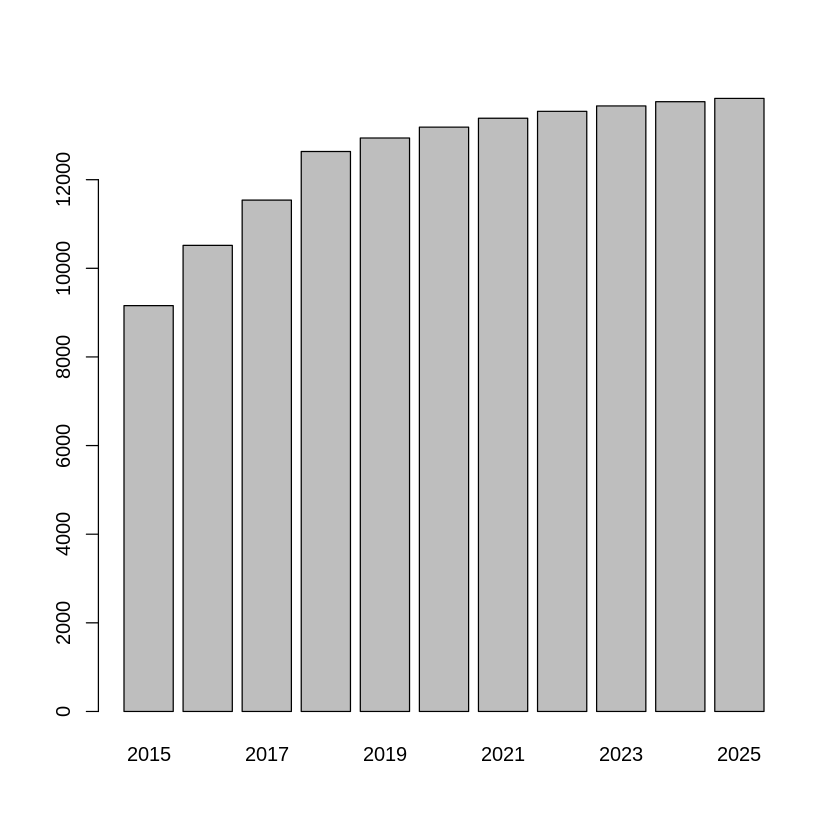

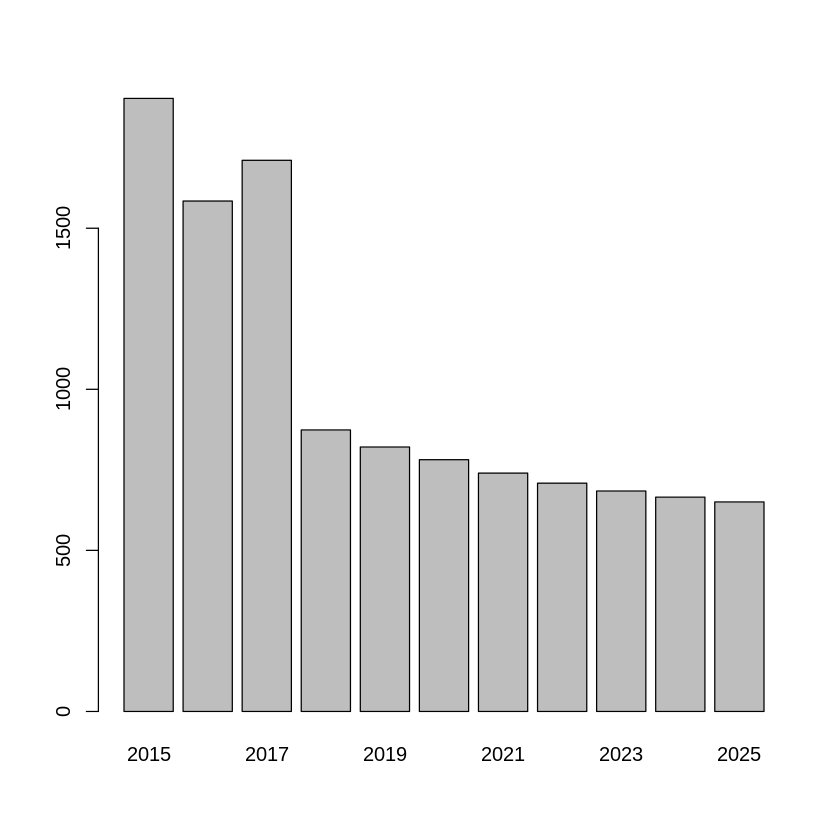

In [46]:
# Plot inactive, active high value customers over time
barplot(segments[1, ])
barplot(segments[2, ])

In [47]:
# Display how segments will evolve over time
print(round(segments))

                  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
inactive          9158 10517 11539 12636 12940 13186 13386 13542 13664 13759
cold              1903  1584  1711   874   821   782   740   709   684   665
warm high value    119   144   165   160   156   152   149   146   143   141
warm low value     901   991  1058   989   938   884   844   813   789   771
new warm           938   987     0     0     0     0     0     0     0     0
active high value  573   657   639   624   607   593   581   571   562   554
active low value  3313  3537  3305  3134  2954  2820  2717  2637  2575  2527
new active        1512     0     0     0     0     0     0     0     0     0
                   2025
inactive          13834
cold                650
warm high value     139
warm low value      756
new warm              0
active high value   547
active low value   2490
new active            0


# --- COMPUTE THE (DISCOUNTED) CLV OF A DATABASE -----------

In [48]:
# Yearly revenue per segment
# This comes directly from module 2, lines 160-161
yearly_revenue = c(0, 0, 0, 0, 0, 323.57, 52.31, 79.17)

In [49]:
yearly_revenue

[1]   0.00   0.00   0.00   0.00   0.00 323.57  52.31  79.17

In [50]:
# Compute revenue per segment
revenue_per_segment = yearly_revenue * segments
print(revenue_per_segment)

                      2015     2016     2017     2018     2019     2020
inactive               0.0      0.0      0.0      0.0      0.0      0.0
cold                   0.0      0.0      0.0      0.0      0.0      0.0
warm high value        0.0      0.0      0.0      0.0      0.0      0.0
warm low value         0.0      0.0      0.0      0.0      0.0      0.0
new warm               0.0      0.0      0.0      0.0      0.0      0.0
active high value 185405.6 212495.8 206634.8 202009.1 196555.6 191967.7
active low value  173303.0 184999.5 172904.6 163925.2 154528.3 147531.6
new active        119705.0      0.0      0.0      0.0      0.0      0.0
                      2021     2022     2023     2024     2025
inactive               0.0      0.0      0.0      0.0      0.0
cold                   0.0      0.0      0.0      0.0      0.0
warm high value        0.0      0.0      0.0      0.0      0.0
warm low value         0.0      0.0      0.0      0.0      0.0
new warm               0.0      0.0  

  2015   2016   2017   2018   2019   2020   2021   2022   2023   2024   2025 
478414 397495 379539 365934 351084 339499 330150 322568 316420 311428 307370 


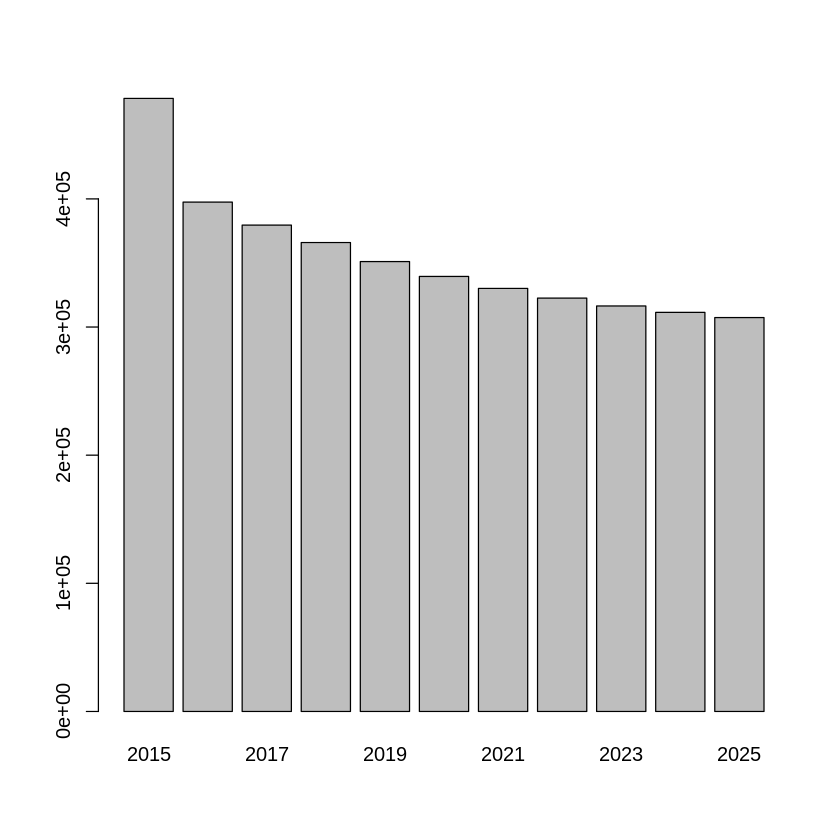

In [51]:
# Compute yearly revenue
yearly_revenue = colSums(revenue_per_segment)
print(round(yearly_revenue))
barplot(yearly_revenue)

   2015    2016    2017    2018    2019    2020    2021    2022    2023    2024 
 478414  875909 1255448 1621383 1972467 2311966 2642116 2964685 3281105 3592533 
   2025 
3899903 


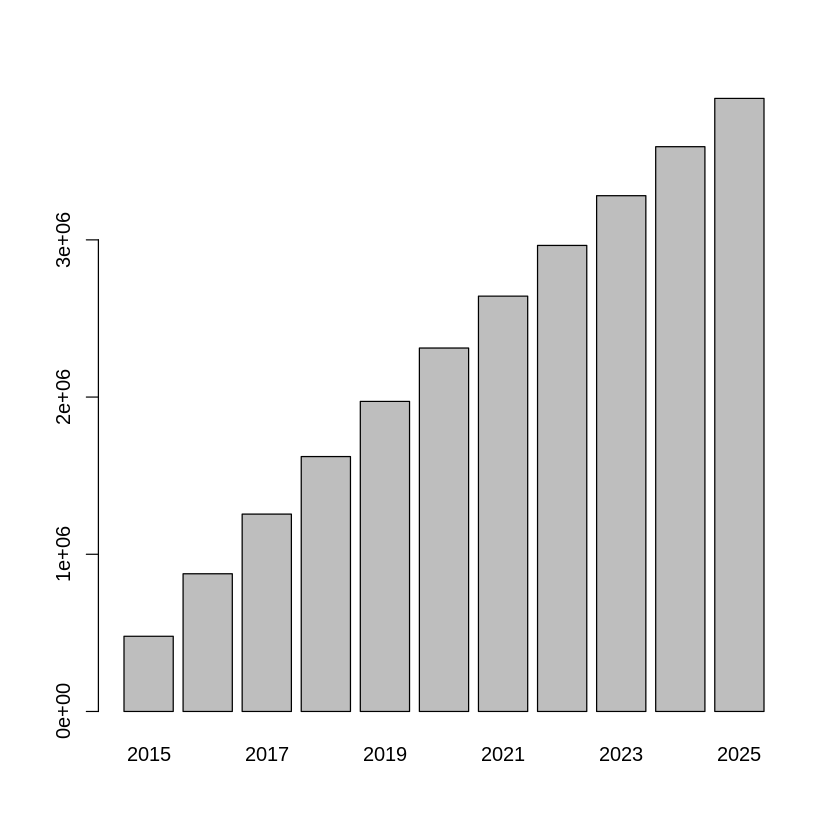

In [52]:
# Compute cumulated revenue
cumulated_revenue = cumsum(yearly_revenue)
print(round(cumulated_revenue))
barplot(cumulated_revenue)

In [53]:
# Create a discount factor
discount_rate = 0.10
discount = 1 / ((1 + discount_rate) ^ ((1:11) - 1))
print(discount)

 [1] 1.0000000 0.9090909 0.8264463 0.7513148 0.6830135 0.6209213 0.5644739
 [8] 0.5131581 0.4665074 0.4240976 0.3855433


  2015   2016   2017   2018   2019   2020   2021   2022   2023   2024   2025 
478414 361359 313669 274932 239795 210802 186361 165528 147612 132076 118505 


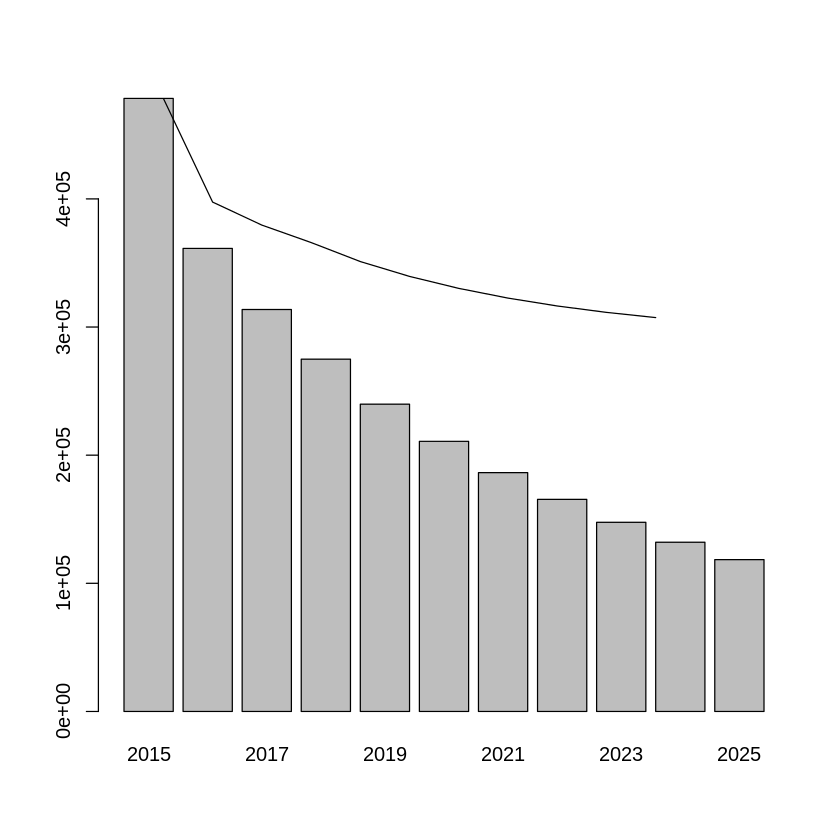

In [54]:
# Compute discounted yearly revenue
disc_yearly_revenue = yearly_revenue * discount
print(round(disc_yearly_revenue))
barplot(disc_yearly_revenue)
lines(yearly_revenue)


   2015    2016    2017    2018    2019    2020    2021    2022    2023    2024 
 478414  839773 1153442 1428374 1668169 1878971 2065333 2230861 2378473 2510549 
   2025 
2629054 


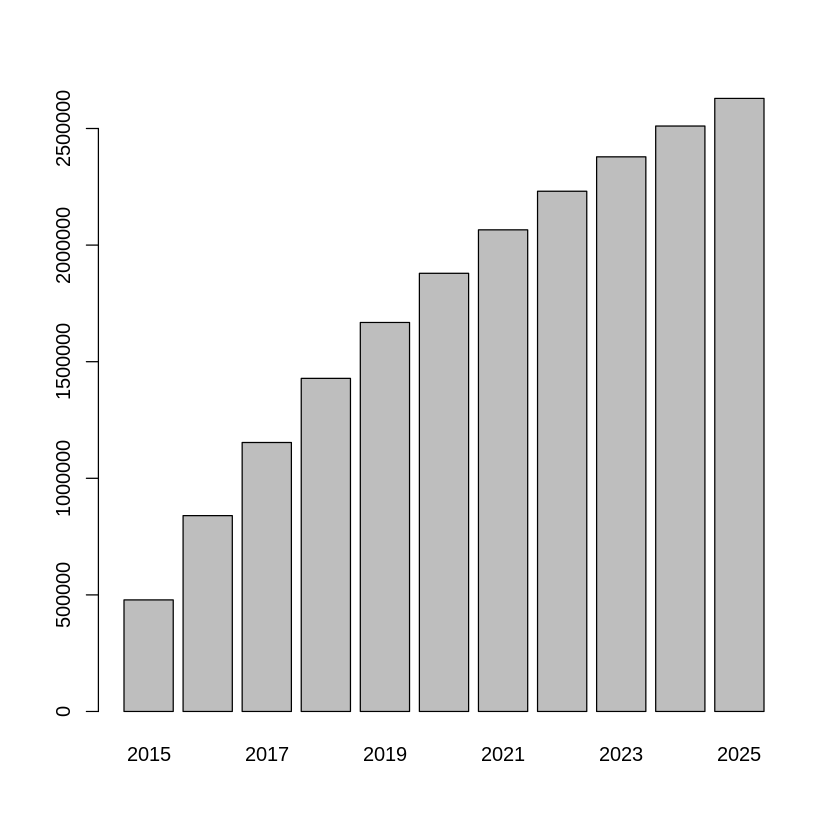

In [55]:
# Compute discounted cumulated revenue
disc_cumulated_revenue = cumsum(disc_yearly_revenue)
print(round(disc_cumulated_revenue))
barplot(disc_cumulated_revenue)

In [56]:
# What is the database worth?
print(disc_cumulated_revenue[11] - yearly_revenue[1])

   2025 
2150640 


In [57]:
yearly_revenue

2015     2016     2017     2018     2019     2020     2021     2022 
478413.7 397495.3 379539.4 365934.3 351083.9 339499.3 330150.4 322568.1 
    2023     2024     2025 
316420.0 311428.3 307370.5